In [4]:
from jmetal.lab.experiment import Experiment, Job, generate_summary_from_experiment
from jmetal.operator import PolynomialMutation, SBXCrossover
from jmetal.util.solution import get_non_dominated_solutions, read_solutions
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.algorithm.multiobjective.nsgaii import NSGAII
from jmetal.core.quality_indicator import HyperVolume, EpsilonIndicator

import matplotlib.pyplot as plt
import numpy as np
from modnsgaii import S_NSGAII

from jmetal.problem import ZDT1, ZDT2, ZDT3

In [5]:

def configure_experiment(problems: list, 
                             n_run: int, 
                             n_population_size: int,
                             n_max_evaluations: int,
                             n_offspring_size: int):
    jobs = []

    for run in range(n_run):
        for problem in problems:
            jobs.append(
                Job(
                    algorithm=S_NSGAII(
                        problem=problem,
                        population_size=n_population_size,
                        offspring_population_size=n_offspring_size,
                        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables(), distribution_index=20),
                        crossover=SBXCrossover(probability=1.0, distribution_index=20),
                        termination_criterion=StoppingByEvaluations(max_evaluations=n_max_evaluations),
                        batch_sample_percentaje = 0.5,
                    ),
                algorithm_tag='NSGAII surrogate 50% batch size alternate',
                problem_tag=problem.name(),
                run=run,
                )
            )
            jobs.append(
                Job(
                    algorithm=S_NSGAII(
                        problem=problem,
                        population_size=n_population_size,
                        offspring_population_size=n_offspring_size,
                        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables(), distribution_index=20),
                        crossover=SBXCrossover(probability=1.0, distribution_index=20),
                        termination_criterion=StoppingByEvaluations(max_evaluations=n_max_evaluations),
                        batch_sample_percentaje = 0.3,
                    ),
                algorithm_tag='NSGAII surrogate 30% batch size alternate',
                problem_tag=problem.name(),
                run=run,
                )
            )
            jobs.append(
                Job(
                    algorithm=S_NSGAII(
                        problem=problem,
                        population_size=n_population_size,
                        offspring_population_size=n_offspring_size,
                        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables(), distribution_index=20),
                        crossover=SBXCrossover(probability=1.0, distribution_index=20),
                        termination_criterion=StoppingByEvaluations(max_evaluations=n_max_evaluations),
                        batch_sample_percentaje = 0.1,
                    ),
                algorithm_tag='NSGAII surrogate 10% batch size alternate',
                problem_tag=problem.name(),
                run=run,
                )
            )
            jobs.append(
                Job(
                    algorithm=NSGAII(
                        problem=problem,
                        population_size=n_population_size,
                        offspring_population_size=n_offspring_size,
                        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables(), distribution_index=20),
                        crossover=SBXCrossover(probability=1.0, distribution_index=20),
                        termination_criterion=StoppingByEvaluations(max_evaluations=n_max_evaluations),
                ),
                algorithm_tag='NSGAII',
                problem_tag=problem.name(),
                run=run
                )
            )

    return jobs   

In [6]:
 # Configure the experiments
jobs = configure_experiment(problems=[ZDT1(), ZDT2(), ZDT3()], n_run=3, n_population_size=100, n_max_evaluations=50000, n_offspring_size=100)

# Run the study
output_directory = "data"

experiment = Experiment(output_dir=output_directory, jobs=jobs)
experiment.run()

# Generate summary file
generate_summary_from_experiment(
    input_dir=output_directory,
    reference_fronts="resources/reference_front",
    quality_indicators=[EpsilonIndicator(), HyperVolume([1.0, 1.0])],
)

Train cycle:  1
Training algorithm 
duplicates rows:  16168
MSE evaluation train:  0.010253394015994713


[2024-05-09 08:54:24,954] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 50% batch size alternate\ZDT1\FUN.0.tsv
[2024-05-09 08:54:24,970] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 50% batch size alternate\ZDT1\VAR.0.tsv


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  9071
MSE evaluation train:  0.011009377217565872
Train cycle:  2
Partial training algorithm
duplicates rows:  23868
previous  5929
no_duplicates  6132
MSE evaluation train:  0.15858195579042703


[2024-05-09 08:54:36,864] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 30% batch size alternate\ZDT1\FUN.0.tsv
[2024-05-09 08:54:36,864] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 30% batch size alternate\ZDT1\VAR.0.tsv


Number of surrogate evaluation:  200
Total surrogate evaluation:  20000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  2325
MSE evaluation train:  0.008363467150070287
Train cycle:  2
Partial training algorithm
duplicates rows:  6803
previous  2675
no_duplicates  3197
MSE evaluation train:  0.07493931135928242
Train cycle:  3
Partial training algorithm
duplicates rows:  11695
previous  3197
no_duplicates  3305
MSE evaluation train:  0.0864281145917666
Train cycle:  4
Partial training algorithm
duplicates rows:  16647
previous  3305
no_duplicates  3353
MSE evaluation train:  0.28687779245226375
Train cycle:  5
Partial training algorithm
duplicates rows:  21558
previous  3353
no_duplicates  3442
MSE evaluation train:  0.17099931737945115


[2024-05-09 08:54:48,129] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 10% batch size alternate\ZDT1\FUN.0.tsv
[2024-05-09 08:54:48,129] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 10% batch size alternate\ZDT1\VAR.0.tsv
[2024-05-09 08:54:48,129] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-09 08:54:48,129] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-09 08:54:48,145] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-09 08:54:48,145] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000


[2024-05-09 08:54:58,528] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-09 08:54:58,528] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII\ZDT1\FUN.0.tsv
[2024-05-09 08:54:58,528] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII\ZDT1\VAR.0.tsv


Train cycle:  1
Training algorithm 
duplicates rows:  15320
MSE evaluation train:  0.003055631571745135


[2024-05-09 08:55:09,380] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 50% batch size alternate\ZDT2\FUN.0.tsv
[2024-05-09 08:55:09,380] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 50% batch size alternate\ZDT2\VAR.0.tsv


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  8142
MSE evaluation train:  0.0012409142029891202
Train cycle:  2
Partial training algorithm
duplicates rows:  20898
previous  6858
no_duplicates  9102
MSE evaluation train:  0.048768904353199485


[2024-05-09 08:55:20,408] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 30% batch size alternate\ZDT2\FUN.0.tsv
[2024-05-09 08:55:20,408] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 30% batch size alternate\ZDT2\VAR.0.tsv


Number of surrogate evaluation:  200
Total surrogate evaluation:  20000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  2308
MSE evaluation train:  0.0006517596110340249
Train cycle:  2
Partial training algorithm
duplicates rows:  6576
previous  2692
no_duplicates  3424
MSE evaluation train:  0.10602840897088615
Train cycle:  3
Partial training algorithm
duplicates rows:  11477
previous  3424
no_duplicates  3523
MSE evaluation train:  0.18170167586308267
Train cycle:  4
Partial training algorithm
duplicates rows:  16384
previous  3523
no_duplicates  3616
MSE evaluation train:  0.3591271990704885
Train cycle:  5
Partial training algorithm
duplicates rows:  21286
previous  3616
no_duplicates  3714
MSE evaluation train:  0.5707112649842011


[2024-05-09 08:55:31,594] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 10% batch size alternate\ZDT2\FUN.0.tsv
[2024-05-09 08:55:31,594] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 10% batch size alternate\ZDT2\VAR.0.tsv
[2024-05-09 08:55:31,594] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-09 08:55:31,594] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-09 08:55:31,607] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-09 08:55:31,607] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000


[2024-05-09 08:55:42,306] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-09 08:55:42,306] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII\ZDT2\FUN.0.tsv
[2024-05-09 08:55:42,306] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII\ZDT2\VAR.0.tsv


Train cycle:  1
Training algorithm 
duplicates rows:  16629
MSE evaluation train:  0.0097950291646852


[2024-05-09 08:55:53,021] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 50% batch size alternate\ZDT3\FUN.0.tsv
[2024-05-09 08:55:53,021] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 50% batch size alternate\ZDT3\VAR.0.tsv


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  9388
MSE evaluation train:  0.00891613126652258
Train cycle:  2
Partial training algorithm
duplicates rows:  23392
previous  5612
no_duplicates  6608
MSE evaluation train:  0.020436230380588637


[2024-05-09 08:56:04,720] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 30% batch size alternate\ZDT3\FUN.0.tsv
[2024-05-09 08:56:04,720] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 30% batch size alternate\ZDT3\VAR.0.tsv


Number of surrogate evaluation:  200
Total surrogate evaluation:  20000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  2424
MSE evaluation train:  0.009199344147047638
Train cycle:  2
Partial training algorithm
duplicates rows:  7082
previous  2576
no_duplicates  2918
MSE evaluation train:  0.04902910777309004
Train cycle:  3
Partial training algorithm
duplicates rows:  12011
previous  2918
no_duplicates  2989
MSE evaluation train:  0.0216898522715347
Train cycle:  4
Partial training algorithm
duplicates rows:  16911
previous  2989
no_duplicates  3089
MSE evaluation train:  0.27785135449789056
Train cycle:  5
Partial training algorithm
duplicates rows:  21832
previous  3089
no_duplicates  3168
MSE evaluation train:  0.2799681343263575


[2024-05-09 08:56:16,049] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 10% batch size alternate\ZDT3\FUN.0.tsv
[2024-05-09 08:56:16,049] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 10% batch size alternate\ZDT3\VAR.0.tsv
[2024-05-09 08:56:16,064] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-09 08:56:16,068] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-09 08:56:16,068] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-09 08:56:16,068] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000


[2024-05-09 08:56:26,469] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-09 08:56:26,469] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII\ZDT3\FUN.0.tsv
[2024-05-09 08:56:26,469] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII\ZDT3\VAR.0.tsv


Train cycle:  1
Training algorithm 
duplicates rows:  16244
MSE evaluation train:  0.012199038690084835


[2024-05-09 08:56:37,318] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 50% batch size alternate\ZDT1\FUN.1.tsv
[2024-05-09 08:56:37,318] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 50% batch size alternate\ZDT1\VAR.1.tsv


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  8998
MSE evaluation train:  0.010694310087858087
Train cycle:  2
Partial training algorithm
duplicates rows:  21943
previous  6002
no_duplicates  8057
MSE evaluation train:  0.028410050315771804


[2024-05-09 08:56:48,331] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 30% batch size alternate\ZDT1\FUN.1.tsv
[2024-05-09 08:56:48,331] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 30% batch size alternate\ZDT1\VAR.1.tsv


Number of surrogate evaluation:  200
Total surrogate evaluation:  20000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  2348
MSE evaluation train:  0.008210125366894375
Train cycle:  2
Partial training algorithm
duplicates rows:  6812
previous  2652
no_duplicates  3188
MSE evaluation train:  0.055152412748053235
Train cycle:  3
Partial training algorithm
duplicates rows:  11731
previous  3188
no_duplicates  3269
MSE evaluation train:  0.0755942006987964
Train cycle:  4
Partial training algorithm
duplicates rows:  16633
previous  3269
no_duplicates  3367
MSE evaluation train:  0.11369671617039138
Train cycle:  5
Partial training algorithm
duplicates rows:  21533
previous  3367
no_duplicates  3467
MSE evaluation train:  0.7283374452333602


[2024-05-09 08:56:59,561] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 10% batch size alternate\ZDT1\FUN.1.tsv
[2024-05-09 08:56:59,561] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 10% batch size alternate\ZDT1\VAR.1.tsv
[2024-05-09 08:56:59,575] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-09 08:56:59,578] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-09 08:56:59,580] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-09 08:56:59,581] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000


[2024-05-09 08:57:10,413] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-09 08:57:10,413] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII\ZDT1\FUN.1.tsv
[2024-05-09 08:57:10,413] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII\ZDT1\VAR.1.tsv


Train cycle:  1
Training algorithm 
duplicates rows:  16168
MSE evaluation train:  0.0044905919216429715


[2024-05-09 08:57:21,127] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 50% batch size alternate\ZDT2\FUN.1.tsv
[2024-05-09 08:57:21,143] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 50% batch size alternate\ZDT2\VAR.1.tsv


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  8706
MSE evaluation train:  0.004318714654034443
Train cycle:  2
Partial training algorithm
duplicates rows:  22267
previous  6294
no_duplicates  7733
MSE evaluation train:  0.06015532738557311


[2024-05-09 08:57:32,077] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 30% batch size alternate\ZDT2\FUN.1.tsv
[2024-05-09 08:57:32,077] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 30% batch size alternate\ZDT2\VAR.1.tsv


Number of surrogate evaluation:  200
Total surrogate evaluation:  20000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  2131
MSE evaluation train:  7.690476088232167e-06
Train cycle:  2
Partial training algorithm
duplicates rows:  6872
previous  2869
no_duplicates  3128
MSE evaluation train:  0.10799194431235778
Train cycle:  3
Partial training algorithm
duplicates rows:  11772
previous  3128
no_duplicates  3228
MSE evaluation train:  0.18222629494486653
Train cycle:  4
Partial training algorithm
duplicates rows:  16673
previous  3228
no_duplicates  3327
MSE evaluation train:  0.9133445872882759
Train cycle:  5
Partial training algorithm
duplicates rows:  21573
previous  3327
no_duplicates  3427
MSE evaluation train:  0.28127573912776627


[2024-05-09 08:57:43,492] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 10% batch size alternate\ZDT2\FUN.1.tsv
[2024-05-09 08:57:43,493] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 10% batch size alternate\ZDT2\VAR.1.tsv
[2024-05-09 08:57:43,493] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-09 08:57:43,493] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-09 08:57:43,493] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-09 08:57:43,493] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000


[2024-05-09 08:57:54,096] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-09 08:57:54,097] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII\ZDT2\FUN.1.tsv
[2024-05-09 08:57:54,101] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII\ZDT2\VAR.1.tsv


Train cycle:  1
Training algorithm 
duplicates rows:  16548
MSE evaluation train:  0.009412846620241873


[2024-05-09 08:58:05,022] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 50% batch size alternate\ZDT3\FUN.1.tsv
[2024-05-09 08:58:05,024] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 50% batch size alternate\ZDT3\VAR.1.tsv


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  9317
MSE evaluation train:  0.00787264728961352
Train cycle:  2
Partial training algorithm
duplicates rows:  23163
previous  5683
no_duplicates  6837
MSE evaluation train:  0.015772089185090647


[2024-05-09 08:58:16,020] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 30% batch size alternate\ZDT3\FUN.1.tsv
[2024-05-09 08:58:16,020] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 30% batch size alternate\ZDT3\VAR.1.tsv


Number of surrogate evaluation:  200
Total surrogate evaluation:  20000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  2449
MSE evaluation train:  0.010872088375208828
Train cycle:  2
Partial training algorithm
duplicates rows:  7058
previous  2551
no_duplicates  2942
MSE evaluation train:  0.05014074085492473
Train cycle:  3
Partial training algorithm
duplicates rows:  11963
previous  2942
no_duplicates  3037
MSE evaluation train:  0.03676311339808942
Train cycle:  4
Partial training algorithm
duplicates rows:  16864
previous  3037
no_duplicates  3136
MSE evaluation train:  0.2406780344855787
Train cycle:  5
Partial training algorithm
duplicates rows:  21757
previous  3136
no_duplicates  3243
MSE evaluation train:  0.42040123933696644


[2024-05-09 08:58:27,568] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 10% batch size alternate\ZDT3\FUN.1.tsv
[2024-05-09 08:58:27,568] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 10% batch size alternate\ZDT3\VAR.1.tsv
[2024-05-09 08:58:27,568] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-09 08:58:27,585] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-09 08:58:27,586] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-09 08:58:27,587] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000


[2024-05-09 08:58:38,167] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-09 08:58:38,167] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII\ZDT3\FUN.1.tsv
[2024-05-09 08:58:38,167] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII\ZDT3\VAR.1.tsv


Train cycle:  1
Training algorithm 
duplicates rows:  16313
MSE evaluation train:  0.010334780644255647


[2024-05-09 08:58:49,082] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 50% batch size alternate\ZDT1\FUN.2.tsv
[2024-05-09 08:58:49,082] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 50% batch size alternate\ZDT1\VAR.2.tsv


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  9045
MSE evaluation train:  0.010185155368042388
Train cycle:  2
Partial training algorithm
duplicates rows:  22291
previous  5955
no_duplicates  7709
MSE evaluation train:  0.022769429273264793


[2024-05-09 08:59:00,248] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 30% batch size alternate\ZDT1\FUN.2.tsv
[2024-05-09 08:59:00,248] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 30% batch size alternate\ZDT1\VAR.2.tsv


Number of surrogate evaluation:  200
Total surrogate evaluation:  20000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  2332
MSE evaluation train:  0.00794482695973031
Train cycle:  2
Partial training algorithm
duplicates rows:  6625
previous  2668
no_duplicates  3375
MSE evaluation train:  0.052961237474661874
Train cycle:  3
Partial training algorithm
duplicates rows:  11525
previous  3375
no_duplicates  3475
MSE evaluation train:  0.14427621836107898
Train cycle:  4
Partial training algorithm
duplicates rows:  16439
previous  3475
no_duplicates  3561
MSE evaluation train:  0.14107369601743772
Train cycle:  5
Partial training algorithm
duplicates rows:  21356
previous  3561
no_duplicates  3644
MSE evaluation train:  0.12800782274734962


[2024-05-09 08:59:11,661] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 10% batch size alternate\ZDT1\FUN.2.tsv
[2024-05-09 08:59:11,661] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 10% batch size alternate\ZDT1\VAR.2.tsv
[2024-05-09 08:59:11,661] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-09 08:59:11,661] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-09 08:59:11,661] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-09 08:59:11,661] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000


[2024-05-09 08:59:22,078] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-09 08:59:22,078] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII\ZDT1\FUN.2.tsv
[2024-05-09 08:59:22,078] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII\ZDT1\VAR.2.tsv


Train cycle:  1
Training algorithm 
duplicates rows:  15979
MSE evaluation train:  0.004893850189173486


[2024-05-09 08:59:33,224] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 50% batch size alternate\ZDT2\FUN.2.tsv
[2024-05-09 08:59:33,226] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 50% batch size alternate\ZDT2\VAR.2.tsv


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  8710
MSE evaluation train:  0.004108719329766869
Train cycle:  2
Partial training algorithm
duplicates rows:  22332
previous  6290
no_duplicates  7668
MSE evaluation train:  0.06416227845881393


[2024-05-09 08:59:44,515] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 30% batch size alternate\ZDT2\FUN.2.tsv
[2024-05-09 08:59:44,517] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 30% batch size alternate\ZDT2\VAR.2.tsv


Number of surrogate evaluation:  200
Total surrogate evaluation:  20000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  2169
MSE evaluation train:  1.025735239022785e-05
Train cycle:  2
Partial training algorithm
duplicates rows:  7051
previous  2831
no_duplicates  2949
MSE evaluation train:  0.09013251405162416
Train cycle:  3
Partial training algorithm
duplicates rows:  11956
previous  2949
no_duplicates  3044
MSE evaluation train:  0.791584364396284
Train cycle:  4
Partial training algorithm
duplicates rows:  16853
previous  3044
no_duplicates  3147
MSE evaluation train:  0.7613203043484617
Train cycle:  5
Partial training algorithm
duplicates rows:  21753
previous  3147
no_duplicates  3247
MSE evaluation train:  0.16528350092075816


[2024-05-09 08:59:56,227] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 10% batch size alternate\ZDT2\FUN.2.tsv
[2024-05-09 08:59:56,229] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 10% batch size alternate\ZDT2\VAR.2.tsv
[2024-05-09 08:59:56,236] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-09 08:59:56,236] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-09 08:59:56,236] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-09 08:59:56,236] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000


[2024-05-09 09:00:08,302] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-09 09:00:08,302] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII\ZDT2\FUN.2.tsv
[2024-05-09 09:00:08,302] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII\ZDT2\VAR.2.tsv


Train cycle:  1
Training algorithm 
duplicates rows:  16631
MSE evaluation train:  0.008294145623983593


[2024-05-09 09:00:19,454] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 50% batch size alternate\ZDT3\FUN.2.tsv
[2024-05-09 09:00:19,469] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 50% batch size alternate\ZDT3\VAR.2.tsv


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  9466
MSE evaluation train:  0.008976375592473844
Train cycle:  2
Partial training algorithm
duplicates rows:  23349
previous  5534
no_duplicates  6651
MSE evaluation train:  0.028502296580375567


[2024-05-09 09:00:30,620] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 30% batch size alternate\ZDT3\FUN.2.tsv
[2024-05-09 09:00:30,620] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 30% batch size alternate\ZDT3\VAR.2.tsv


Number of surrogate evaluation:  200
Total surrogate evaluation:  20000
Total evaluation:  50000
Train cycle:  1
Training algorithm 
duplicates rows:  2426
MSE evaluation train:  0.008107369166422226
Train cycle:  2
Partial training algorithm
duplicates rows:  7042
previous  2574
no_duplicates  2958
MSE evaluation train:  0.05344930218434365
Train cycle:  3
Partial training algorithm
duplicates rows:  11936
previous  2958
no_duplicates  3064
MSE evaluation train:  0.027676018911574726
Train cycle:  4
Partial training algorithm
duplicates rows:  16837
previous  3064
no_duplicates  3163
MSE evaluation train:  0.19285914288233147
Train cycle:  5
Partial training algorithm
duplicates rows:  21733
previous  3163
no_duplicates  3267
MSE evaluation train:  0.5635401757533478


[2024-05-09 09:00:42,270] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII surrogate 10% batch size alternate\ZDT3\FUN.2.tsv
[2024-05-09 09:00:42,270] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII surrogate 10% batch size alternate\ZDT3\VAR.2.tsv
[2024-05-09 09:00:42,270] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-09 09:00:42,270] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-09 09:00:42,286] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-09 09:00:42,286] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000


[2024-05-09 09:00:53,050] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-09 09:00:53,050] [jmetal.util.solution] [INFO] Output file (function values): data\NSGAII\ZDT3\FUN.2.tsv
[2024-05-09 09:00:53,052] [jmetal.util.solution] [INFO] Output file (variables): data\NSGAII\ZDT3\VAR.2.tsv


In [7]:
import pandas as pd
quality_data = pd.read_csv('QualityIndicatorSummary.csv')
quality_data


,Algorithm,Problem,ExecutionId,IndicatorName,IndicatorValue
0,NSGAII,ZDT1,0,EP,0.010861
1,NSGAII,ZDT1,0,HV,0.660516
2,NSGAII,ZDT1,1,EP,0.011917
3,NSGAII,ZDT1,1,HV,0.660402
4,NSGAII,ZDT1,2,EP,0.010222
...,...,...,...,...,...
103,NSGAII surrogate 50% batch size alternate,ZDT3,2,EP,0.008609
104,NSGAII surrogate 50% batch size alternate,ZDT3,2,HV,1.100547
105,NSGAII surrogate 50% batch size alternate,ZDT3,0,Time,10.699532
106,NSGAII surrogate 50% batch size alternate,ZDT3,1,Time,10.895339


In [8]:
qd_zdt1 = quality_data[quality_data['Problem'] == 'ZDT1']
qd_zdt2 = quality_data[quality_data['Problem'] == 'ZDT2']
qd_zdt3 = quality_data[quality_data['Problem'] == 'ZDT3']

In [9]:
qd_zdt1[quality_data['IndicatorName']=='HV']

C:\Users\Matias\AppData\Local\Temp\ipykernel_6640\862206307.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qd_zdt1[quality_data['IndicatorName']=='HV']


,Algorithm,Problem,ExecutionId,IndicatorName,IndicatorValue
1,NSGAII,ZDT1,0,HV,0.660516
3,NSGAII,ZDT1,1,HV,0.660402
5,NSGAII,ZDT1,2,HV,0.660426
28,NSGAII surrogate 10% batch size alternate,ZDT1,0,HV,3.728839
30,NSGAII surrogate 10% batch size alternate,ZDT1,1,HV,622.037574
32,NSGAII surrogate 10% batch size alternate,ZDT1,2,HV,66.883992
55,NSGAII surrogate 30% batch size alternate,ZDT1,0,HV,0.909808
57,NSGAII surrogate 30% batch size alternate,ZDT1,1,HV,1.307447
59,NSGAII surrogate 30% batch size alternate,ZDT1,2,HV,1.636692
82,NSGAII surrogate 50% batch size alternate,ZDT1,0,HV,0.699997


In [10]:
qd_zdt1[quality_data['IndicatorName']=='EP']


C:\Users\Matias\AppData\Local\Temp\ipykernel_6640\1172625964.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qd_zdt1[quality_data['IndicatorName']=='EP']


,Algorithm,Problem,ExecutionId,IndicatorName,IndicatorValue
0,NSGAII,ZDT1,0,EP,0.010861
2,NSGAII,ZDT1,1,EP,0.011917
4,NSGAII,ZDT1,2,EP,0.010222
27,NSGAII surrogate 10% batch size alternate,ZDT1,0,EP,-0.002230
29,NSGAII surrogate 10% batch size alternate,ZDT1,1,EP,0.015909
31,NSGAII surrogate 10% batch size alternate,ZDT1,2,EP,-0.000192
54,NSGAII surrogate 30% batch size alternate,ZDT1,0,EP,-0.000064
56,NSGAII surrogate 30% batch size alternate,ZDT1,1,EP,-0.000083
58,NSGAII surrogate 30% batch size alternate,ZDT1,2,EP,-0.000091
81,NSGAII surrogate 50% batch size alternate,ZDT1,0,EP,0.015423


In [11]:
qd_zdt1[quality_data['IndicatorName']=='Time']


C:\Users\Matias\AppData\Local\Temp\ipykernel_6640\146664836.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qd_zdt1[quality_data['IndicatorName']=='Time']


,Algorithm,Problem,ExecutionId,IndicatorName,IndicatorValue
6,NSGAII,ZDT1,0,Time,10.398946
7,NSGAII,ZDT1,1,Time,10.837819
8,NSGAII,ZDT1,2,Time,10.416898
33,NSGAII surrogate 10% batch size alternate,ZDT1,0,Time,11.252950
34,NSGAII surrogate 10% batch size alternate,ZDT1,1,Time,11.219574
35,NSGAII surrogate 10% batch size alternate,ZDT1,2,Time,11.397921
60,NSGAII surrogate 30% batch size alternate,ZDT1,0,Time,11.857466
61,NSGAII surrogate 30% batch size alternate,ZDT1,1,Time,10.984882
62,NSGAII surrogate 30% batch size alternate,ZDT1,2,Time,11.148984
87,NSGAII surrogate 50% batch size alternate,ZDT1,0,Time,11.416085


In [12]:
qd_zdt2[quality_data['IndicatorName']=='HV']

C:\Users\Matias\AppData\Local\Temp\ipykernel_6640\3335202294.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qd_zdt2[quality_data['IndicatorName']=='HV']


,Algorithm,Problem,ExecutionId,IndicatorName,IndicatorValue
10,NSGAII,ZDT2,0,HV,3.272713e-01
12,NSGAII,ZDT2,1,HV,3.276247e-01
14,NSGAII,ZDT2,2,HV,3.275289e-01
37,NSGAII surrogate 10% batch size alternate,ZDT2,0,HV,6.110602e+02
39,NSGAII surrogate 10% batch size alternate,ZDT2,1,HV,1.164412e+14
41,NSGAII surrogate 10% batch size alternate,ZDT2,2,HV,7.550402e+14
64,NSGAII surrogate 30% batch size alternate,ZDT2,0,HV,2.807621e+00
66,NSGAII surrogate 30% batch size alternate,ZDT2,1,HV,3.215480e+00
68,NSGAII surrogate 30% batch size alternate,ZDT2,2,HV,5.714875e+00
91,NSGAII surrogate 50% batch size alternate,ZDT2,0,HV,3.579851e-01


In [13]:
qd_zdt2[quality_data['IndicatorName']=='EP']

C:\Users\Matias\AppData\Local\Temp\ipykernel_6640\788517580.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qd_zdt2[quality_data['IndicatorName']=='EP']


,Algorithm,Problem,ExecutionId,IndicatorName,IndicatorValue
9,NSGAII,ZDT2,0,EP,1.281329e-02
11,NSGAII,ZDT2,1,EP,9.567248e-03
13,NSGAII,ZDT2,2,EP,1.202427e-02
36,NSGAII surrogate 10% batch size alternate,ZDT2,0,EP,-1.940433e-03
38,NSGAII surrogate 10% batch size alternate,ZDT2,1,EP,-1.134455e+05
40,NSGAII surrogate 10% batch size alternate,ZDT2,2,EP,-1.647148e+06
63,NSGAII surrogate 30% batch size alternate,ZDT2,0,EP,-2.216849e-03
65,NSGAII surrogate 30% batch size alternate,ZDT2,1,EP,-2.856377e-03
67,NSGAII surrogate 30% batch size alternate,ZDT2,2,EP,-2.660843e-03
90,NSGAII surrogate 50% batch size alternate,ZDT2,0,EP,1.435645e-02


In [14]:
qd_zdt2[quality_data['IndicatorName']=='Time']

C:\Users\Matias\AppData\Local\Temp\ipykernel_6640\1622664310.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qd_zdt2[quality_data['IndicatorName']=='Time']


,Algorithm,Problem,ExecutionId,IndicatorName,IndicatorValue
15,NSGAII,ZDT2,0,Time,10.712615
16,NSGAII,ZDT2,1,Time,10.603697
17,NSGAII,ZDT2,2,Time,12.066353
42,NSGAII surrogate 10% batch size alternate,ZDT2,0,Time,11.185816
43,NSGAII surrogate 10% batch size alternate,ZDT2,1,Time,11.381720
44,NSGAII surrogate 10% batch size alternate,ZDT2,2,Time,11.701862
69,NSGAII surrogate 30% batch size alternate,ZDT2,0,Time,10.992591
70,NSGAII surrogate 30% batch size alternate,ZDT2,1,Time,10.933461
71,NSGAII surrogate 30% batch size alternate,ZDT2,2,Time,11.281556
96,NSGAII surrogate 50% batch size alternate,ZDT2,0,Time,10.851461


In [15]:
qd_zdt3[quality_data['IndicatorName']=='HV']

C:\Users\Matias\AppData\Local\Temp\ipykernel_6640\2857396329.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qd_zdt3[quality_data['IndicatorName']=='HV']


,Algorithm,Problem,ExecutionId,IndicatorName,IndicatorValue
19,NSGAII,ZDT3,0,HV,1.041129
21,NSGAII,ZDT3,1,HV,1.041257
23,NSGAII,ZDT3,2,HV,1.041215
46,NSGAII surrogate 10% batch size alternate,ZDT3,0,HV,47.689674
48,NSGAII surrogate 10% batch size alternate,ZDT3,1,HV,279.774146
50,NSGAII surrogate 10% batch size alternate,ZDT3,2,HV,0.000000
73,NSGAII surrogate 30% batch size alternate,ZDT3,0,HV,2.582341
75,NSGAII surrogate 30% batch size alternate,ZDT3,1,HV,1.268446
77,NSGAII surrogate 30% batch size alternate,ZDT3,2,HV,1.302686
100,NSGAII surrogate 50% batch size alternate,ZDT3,0,HV,1.086432


In [16]:
qd_zdt3[quality_data['IndicatorName']=='EP']

C:\Users\Matias\AppData\Local\Temp\ipykernel_6640\2499900571.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qd_zdt3[quality_data['IndicatorName']=='EP']


,Algorithm,Problem,ExecutionId,IndicatorName,IndicatorValue
18,NSGAII,ZDT3,0,EP,0.008377
20,NSGAII,ZDT3,1,EP,0.008735
22,NSGAII,ZDT3,2,EP,0.008620
45,NSGAII surrogate 10% batch size alternate,ZDT3,0,EP,0.001225
47,NSGAII surrogate 10% batch size alternate,ZDT3,1,EP,0.032746
49,NSGAII surrogate 10% batch size alternate,ZDT3,2,EP,2.218674
72,NSGAII surrogate 30% batch size alternate,ZDT3,0,EP,-0.000036
74,NSGAII surrogate 30% batch size alternate,ZDT3,1,EP,-0.000033
76,NSGAII surrogate 30% batch size alternate,ZDT3,2,EP,0.000003
99,NSGAII surrogate 50% batch size alternate,ZDT3,0,EP,0.011191


In [17]:
qd_zdt3[quality_data['IndicatorName']=='Time']

C:\Users\Matias\AppData\Local\Temp\ipykernel_6640\2743864688.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qd_zdt3[quality_data['IndicatorName']=='Time']


,Algorithm,Problem,ExecutionId,IndicatorName,IndicatorValue
24,NSGAII,ZDT3,0,Time,10.405074
25,NSGAII,ZDT3,1,Time,10.598937
26,NSGAII,ZDT3,2,Time,10.779273
51,NSGAII surrogate 10% batch size alternate,ZDT3,0,Time,11.328356
52,NSGAII surrogate 10% batch size alternate,ZDT3,1,Time,11.548129
53,NSGAII surrogate 10% batch size alternate,ZDT3,2,Time,11.630977
78,NSGAII surrogate 30% batch size alternate,ZDT3,0,Time,11.682211
79,NSGAII surrogate 30% batch size alternate,ZDT3,1,Time,10.977823
80,NSGAII surrogate 30% batch size alternate,ZDT3,2,Time,11.147027
105,NSGAII surrogate 50% batch size alternate,ZDT3,0,Time,10.699532


In [20]:
referenceFrontZDT1 = np.loadtxt("resources/reference_front/ZDT1.pf", delimiter=' ')
referenceFrontZDT2 = np.loadtxt("resources/reference_front/ZDT2.pf", delimiter=' ')

In [36]:
from jmetal.util.solution import get_non_dominated_solutions, read_solutions
zdt1_nsgaii_original = read_solutions('data/NSGAII/ZDT1/FUN.0.tsv')
objectives = [solution.objectives for solution in zdt1_nsgaii_original]

x_1 = [_[0] for _ in objectives]
y_1 = [_[1] for _ in objectives]

In [37]:
zdt1_nsgaii_s50 = read_solutions('data/NSGAII surrogate 50% batch size alternate/ZDT1/FUN.0.tsv')
objectives_s50 = [solution.objectives for solution in zdt1_nsgaii_s50]

x = [_[0] for _ in objectives_s50]
y = [_[1] for _ in objectives_s50]

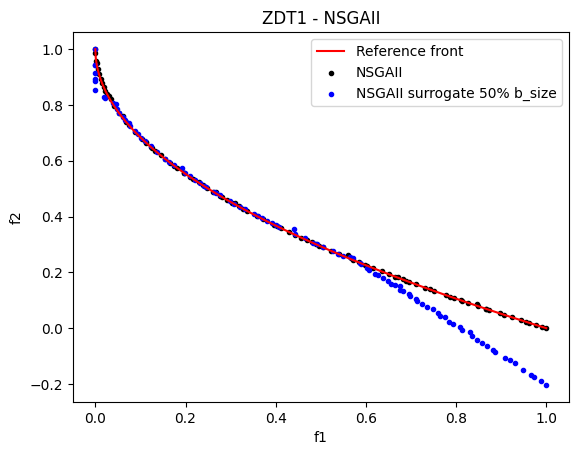

In [40]:
plt.plot(referenceFrontZDT1[:,0], referenceFrontZDT1[:,1], color="red")

plt.scatter(x_1, y_1, color="black", marker = '.')
plt.scatter(x, y, color="blue", marker = '.',)

plt.xlabel("f1")
plt.ylabel("f2")
plt.title("ZDT1 - NSGAII")	
plt.legend(["Reference front","NSGAII", "NSGAII surrogate 50% b_size"])